In [9]:
from simulation import monte_carlo_simulation
from matplotlib import pyplot as plt
import numpy as np

## Hypothesis 1. <>


Average evacuation time: 45.78 seconds
Standard deviation: 7.53 seconds


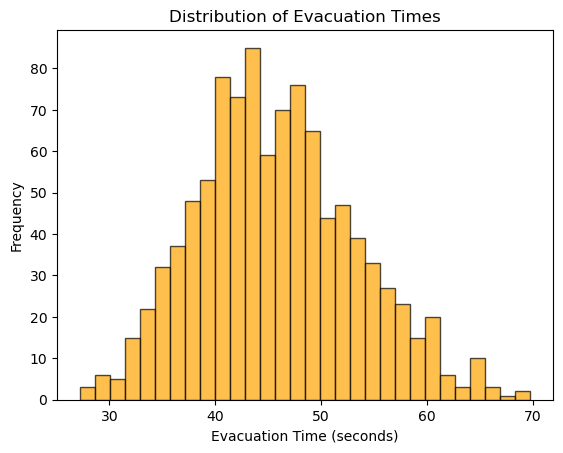

In [10]:
rows = 30           # Number of rows in the plane
seats_per_row = 6   # Seats per row (standard economy configuration)
exits = [0, 15, 29] # Locations of exits (front, middle, back exits)
speed_factor = 0.6  # First three rows move faster (80% of the normal time)
door_opening_time = 2  # Time for middle exit door to open (2 seconds)
num_simulations = 1000
proportion_old = 0.3  # 30% old passengers
old_in_first_3_rows_prob = 0.6  # 70% chance for old passengers to sit in the first 3 rows
emergency_level = 0.9  # Emergency level: 0.0 (low) to 1.0 (high)
occupancy_rate = 0.8  # 80% of seats are occupied

evacuation_times = monte_carlo_simulation(rows, seats_per_row, exits, speed_factor, door_opening_time, num_simulations,
                                          proportion_old, old_in_first_3_rows_prob, emergency_level, occupancy_rate)

# Analyze the results
average_time = np.mean(evacuation_times)
std_deviation = np.std(evacuation_times)

print(f"Average evacuation time: {average_time:.2f} seconds")
print(f"Standard deviation: {std_deviation:.2f} seconds")

# Plot the results
plt.hist(evacuation_times, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Evacuation Times')
plt.xlabel('Evacuation Time (seconds)')
plt.ylabel('Frequency')
plt.show()
